##kaggle connection for time   **Note - please  dont run**

1. Go to your account, Scroll to API section and Click Expire API Token to remove previous tokens

2. Click on Create New API Token - It will download kaggle.json file on your machine.

3. Go to your Google Colab project file and run the following commands:



In [ ]:
#insatll kaggle package

! pip install -q kaggle

In [ ]:
from google.colab import files

In [ ]:
#uploading the kaggle json file to access the kaggle datasets

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"parker27","key":"87c3503ffdef495342d6f7eab9081ecf"}'}

In [ ]:
#making a dircetory for kaggle

! mkdir ~/.kaggle

In [ ]:
#Makeing a directory named kaggle and copy kaggle.json file there

! cp kaggle.json ~/.kaggle/

In [ ]:
#Change the permissions of the file

! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
#afer successfull connection it will display the kaggle open datasets

! kaggle datasets list

ref                                                      title                                     size  lastUpdated          downloadCount  voteCount  usabilityRating  
-------------------------------------------------------  ---------------------------------------  -----  -------------------  -------------  ---------  ---------------  
themrityunjaypathak/covid-cases-and-deaths-worldwide     Covid Cases and Deaths WorldWide           8KB  2023-02-01 12:22:51          11667        384  1.0              
naveenkumar20bps1137/walmart-sales-analysis              WALMART SALES ANALYSIS                   119KB  2023-03-03 18:02:11           2006         54  0.9411765        
datascientistanna/customers-dataset                      Shop Customer Data                        23KB  2023-02-07 18:42:21          10045        227  1.0              
ulrikthygepedersen/co2-emissions-by-country              CO2 Emissions                            114KB  2023-02-28 12:39:49            931         30

### now giving the kaggle dataset link we want to use in colab
### after it will download the dataset from kaggle

In [ ]:
!kaggle datasets download -d ashenafifasilkebede/dataset

100% 2.93G/2.93G [01:46<00:00, 32.8MB/s]
100% 2.93G/2.93G [01:46<00:00, 29.7MB/s]



1.   now the dataset is downloaded from kaggle in a zip file in the local colab cloud storage
2.   now unzipping the zip file to the destination folder
1.   connect gdrive to store the dataset for future use
2.   after mounting gdrive start unzipping mthe file






In [ ]:
!unzip -q "/content/dataset.zip" -d "/content/drive/MyDrive/Datasets/Oral cancer dataset"

## Folder size checking

connect gdrive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
# function for folder size in bytes

def get_folder_size(folder_path):
    total_size = 0
    for dirpath, dirnames, filenames in os.walk(folder_path):
        for file in filenames:
            file_path = os.path.join(dirpath, file)
            if os.path.isfile(file_path):
                total_size += os.path.getsize(file_path)
    return total_size

In [ ]:
#bytes to gb

def bytes_to_gb(size_in_bytes):
    size_in_gb = size_in_bytes / (1024**3)
    return size_in_gb

In [ ]:
#defining the path

folder_path = '/content/drive/MyDrive/Datasets/Oral cancer dataset'

In [ ]:
folder_size = get_folder_size(folder_path)
print(f"The size of the folder at {folder_path} is {folder_size} bytes.")

The size of the folder at /content/drive/MyDrive/Datasets/Oral cancer dataset is 3190768633 bytes.


In [ ]:
size_in_gb = bytes_to_gb(folder_size)
print(f"{folder_size} bytes is equivalent to {size_in_gb:.2f} GB.")

3190768633 bytes is equivalent to 2.97 GB.


### checking how many folders and sub folders are there

In [ ]:
def count_subfolders(directory):
    count = 0
    subfolders = []
    for filename in os.listdir(directory):
        path = os.path.join(directory, filename)
        if os.path.isdir(path):
            count += 1
            subfolders.append(filename)
            sub_count, sub_subs = count_subfolders(path)
            count += sub_count
            subfolders += [os.path.join(filename, sub) for sub in sub_subs]
    return count, subfolders

In [ ]:
directory = folder_path
num_subfolders, subfolders = count_subfolders(directory)
print(f"The directory at {directory} contains {num_subfolders} subfolders:")
for subfolder in subfolders:
    print(subfolder)

The directory at /content/drive/MyDrive/Datasets/Oral cancer dataset contains 9 subfolders:
test
test/Normal
test/OSCC
train
train/Normal
train/OSCC
val
val/Normal
val/OSCC


### checking how many images files are there

In [ ]:
def count_jpg_files(directory):
    count = 0
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith(".jpg"):
                count += 1
    return count

In [ ]:
num_jpg_files = count_jpg_files(directory)
print(f"The parent folder at {directory} contains {num_jpg_files} JPG files.")

The parent folder at /content/drive/MyDrive/Datasets/Oral cancer dataset contains 5192 JPG files.


#Main code - VGG16

## plotting the image

In [ ]:
#defining the path

folder_path = '/content/drive/MyDrive/Datasets/Oral cancer dataset'

In [ ]:
folder_path

'/content/drive/MyDrive/Datasets/Oral cancer dataset'

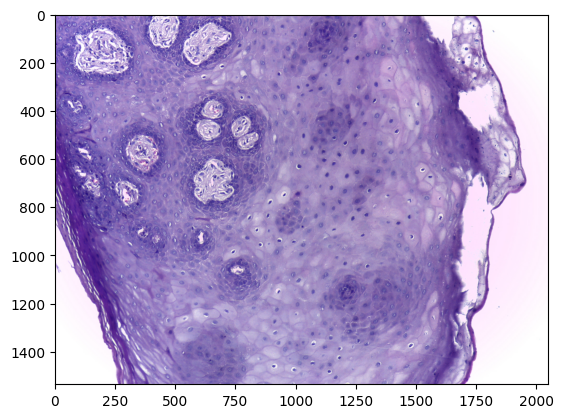

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


image_path = folder_path + "/train/Normal/Normal_100x_6.jpg"
img = mpimg.imread(image_path)
plt.imshow(img)
plt.show()

In [ ]:
#importing requried packages

from keras.preprocessing.image import ImageDataGenerator
from keras.applications import VGG16
from keras import models
from keras import layers
from keras import optimizers

In [ ]:
# Define paths to your training, validation, and testing directories
train_dir = folder_path + '/train'
validation_dir = folder_path + '/val'
test_dir = folder_path + '/test'

In [ ]:
# Define image dimensions and batch size
img_width, img_height = 224, 224
batch_size = 32

In [ ]:
# Use data augmentation for the training data
train_datagen = ImageDataGenerator(rescale=1./255)

# Use only rescaling for the validation and testing data
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
# Create data generators for the training, validation, and testing data
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(img_width, img_height),
                                                    batch_size=batch_size,
                                                    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(img_width, img_height),
                                                        batch_size=batch_size,
                                                        class_mode='binary')

test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=(img_width, img_height),
                                                  batch_size=batch_size,
                                                  class_mode='binary')

Found 4946 images belonging to 2 classes.
Found 120 images belonging to 2 classes.
Found 126 images belonging to 2 classes.


In [ ]:
# rotation_range=40,
# width_shift_range=0.2,
# height_shift_range=0.2,
# shear_range=0.2,
# zoom_range=0.2,
# horizontal_flip=True,
# fill_mode='nearest'

In [ ]:
class_names = list(train_generator.class_indices.keys())

In [ ]:
train_generator.class_indices

{'Normal': 0, 'OSCC': 1}

In [ ]:
class_names

['Normal', 'OSCC']

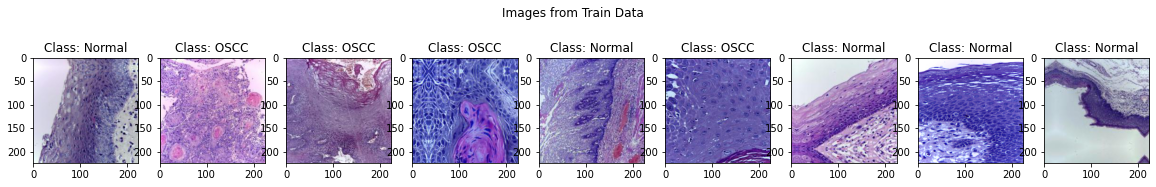

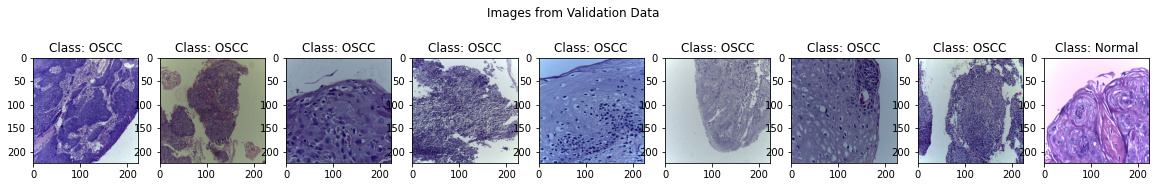

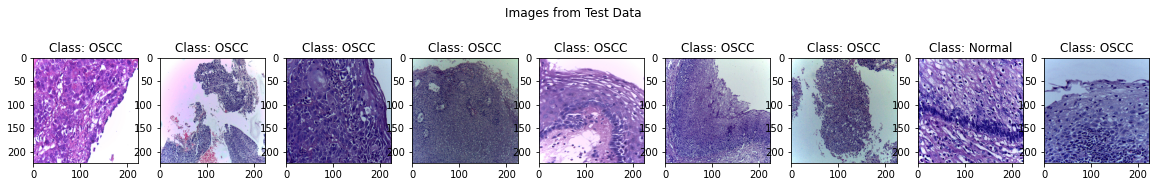

In [ ]:
import matplotlib.pyplot as plt

# Extract the class names from train_generator
class_names = list(train_generator.class_indices.keys())

# Plot the first 9 images from train_generator
fig, axes = plt.subplots(1, 9, figsize=(20, 3))
for i in range(9):
    x, y = train_generator.next()
    img = x[0]
    label = class_names[int(y[0])]
    axes[i].imshow(img)
    axes[i].set_title('Class: {}'.format(label))
plt.suptitle('Images from Train Data')
plt.show()

# Extract the class names from validation_generator
class_names = list(validation_generator.class_indices.keys())

# Plot the first 9 images from validation_generator
fig, axes = plt.subplots(1, 9, figsize=(20, 3))
for i in range(9):
    x, y = validation_generator.next()
    img = x[0]
    label = class_names[int(y[0])]
    axes[i].imshow(img)
    axes[i].set_title('Class: {}'.format(label))
plt.suptitle('Images from Validation Data')
plt.show()

# Extract the class names from test_generator
class_names = list(test_generator.class_indices.keys())

# Plot the first 9 images from test_generator
fig, axes = plt.subplots(1, 9, figsize=(20, 3))
for i in range(9):
    x, y = test_generator.next()
    img = x[0]
    label = class_names[int(y[0])]
    axes[i].imshow(img)
    axes[i].set_title('Class: {}'.format(label))
plt.suptitle('Images from Test Data')
plt.show()


In [ ]:
# Instantiate pre-trained model (VGG16 in this case) without the top layer
conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(img_width, img_height, 3))

# Define a new model with the pre-trained base and your custom classifier layers
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

# Freeze the weights of the pre-trained layers
conv_base.trainable = False

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
# Compile the model
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-5),
              metrics=['acc'])

/usr/local/lib/python3.9/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:143: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
# Fit the model using the generators
history = model.fit(train_generator,
                    steps_per_epoch=train_generator.samples // batch_size,
                    epochs=25,
                    validation_data=validation_generator,
                    validation_steps=validation_generator.samples // batch_size)

Epoch 1/25
154/154 [==============================] - 796s 5s/step - loss: 0.6443 - acc: 0.6256 - val_loss: 0.5022 - val_acc: 0.7500
Epoch 2/25
154/154 [==============================] - 132s 861ms/step - loss: 0.5405 - acc: 0.7377 - val_loss: 0.5053 - val_acc: 0.7500
Epoch 3/25
154/154 [==============================] - 140s 907ms/step - loss: 0.4822 - acc: 0.7810 - val_loss: 0.5353 - val_acc: 0.7292
Epoch 4/25
154/154 [==============================] - 136s 887ms/step - loss: 0.4504 - acc: 0.7981 - val_loss: 0.4103 - val_acc: 0.8021
Epoch 5/25
154/154 [==============================] - 134s 871ms/step - loss: 0.4241 - acc: 0.8193 - val_loss: 0.4463 - val_acc: 0.8021
Epoch 6/25
154/154 [==============================] - 134s 865ms/step - loss: 0.4012 - acc: 0.8225 - val_loss: 0.4813 - val_acc: 0.7917
Epoch 7/25
154/154 [==============================] - 126s 816ms/step - loss: 0.3826 - acc: 0.8362 - val_loss: 0.4279 - val_acc: 0.8125
Epoch 8/25
154/154 [==============================]

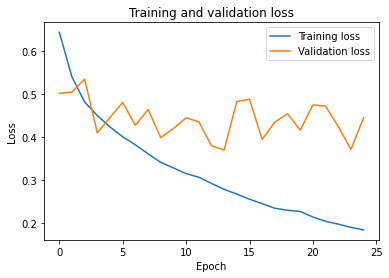

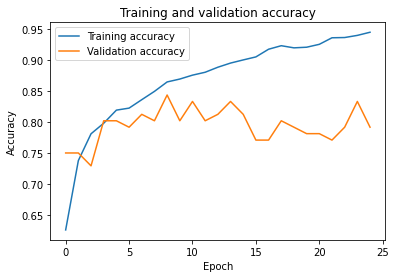

In [ ]:
import matplotlib.pyplot as plt

# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Show the plot
plt.show()

# Plot the training and validation accuracy
plt.plot(history.history['acc'], label='Training accuracy')
plt.plot(history.history['val_acc'], label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Show the plot
plt.show()

In [ ]:
folder_path

'/content/drive/MyDrive/Datasets/Oral cancer dataset'

In [ ]:
# Save the model
model.save('vgg16_model.h5') #pkl

In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
model1 = load_model('/content/drive/MyDrive/Datasets/models/vgg16_model_oral_cancer.h5')

# Use the loaded model for prediction
#predictions = model.predict(test_data)

In [ ]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 256)               6422784   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 21,137,729
Trainable params: 6,423,041
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
# Evaluate the model on the test data
test_loss, test_acc = model1.evaluate(test_generator, steps=test_generator.samples // batch_size)
print('test acc:', test_acc)

3/3 [==============================] - 72s 29s/step - loss: 0.4450 - acc: 0.8333
test acc: 0.8333333134651184


In [ ]:
test_loss

0.4449734389781952

3/3 [==============================] - 17s 4s/step


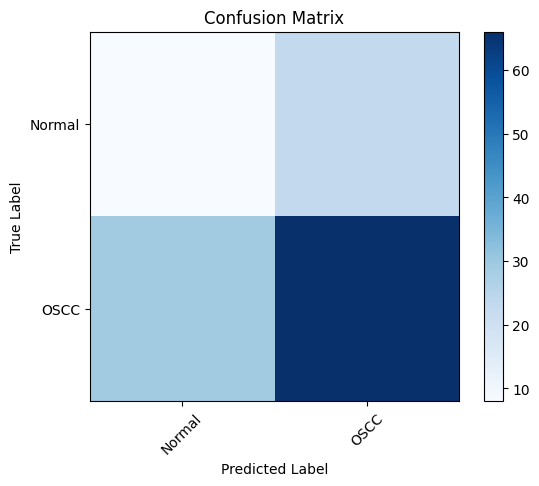

In [ ]:
#confusion matrix


import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Get predictions for the test data
test_predictions = model1.predict(test_generator, steps=test_generator.samples/test_generator.batch_size)
test_predictions = np.round(test_predictions)

# Get true labels for the test data
test_labels = test_generator.classes

# Get class names
class_names = list(train_generator.class_indices.keys())

# Generate confusion matrix
cm = confusion_matrix(test_labels, test_predictions)

# Plot the confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


<Axes: >

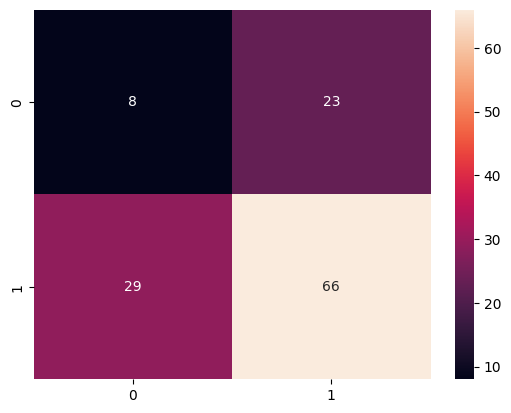

In [ ]:
import seaborn as sns
sns.heatmap(cm, annot=True)

In [ ]:
from PIL import Image
import numpy as np

# Load the image
img = Image.open('/content/drive/MyDrive/Datasets/Oral cancer dataset/test/OSCC/OSCC_100x_112.jpg')

# Preprocess the image to be in the same format as the training data
img = img.resize((img_width, img_height))
img_array = np.array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Use the trained model to predict the label of the image
prediction = model1.predict(img_array)


1/1 [==============================] - 1s 873ms/step


In [ ]:
prediction

array([[0.98591995]], dtype=float32)

In [ ]:
# Print the predicted label
if prediction > 0.5:
    print('The image is a OSCC.')
else:
    print('The image is a Normal.')

The image is a OSCC.


In [ ]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 256)               6422784   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 21,137,729
Trainable params: 6,423,041
Non-trainable params: 14,714,688
_________________________________________________________________
